Part 1: Data Preparation and Exploration
Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.
Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.
Part 2: Model Building - ARIMA
Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.
Part 3: Model Building - Exponential Smoothing
Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).
Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.
Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.
Part 4: Evaluation and Comparison
Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.


In [1]:
import pandas as pd 
import numpy as np 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
exchange_data=pd.read_csv("exchange_rate.csv")

# rename the date column 
exchange_data.rename(columns={"date":"Date"},inplace=True)
# Display the first few rows of the dataset and summary information
print(exchange_data.head())
print(exchange_data.info())

               Date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB
None


# Exploratory Data Analysis (EDA)

In [3]:
#Getting the shape of the dataset
print(exchange_data.shape)
print(exchange_data.columns)

(7588, 2)
Index(['Date', 'Ex_rate'], dtype='object')


In [4]:
# verify the missing values 
exchange_data.isnull().sum()

Date       0
Ex_rate    0
dtype: int64

In [5]:
# Getting the summary of data 
exchange_data.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [6]:
# checking the missing values 
exchange_data.isnull().sum()

Date       0
Ex_rate    0
dtype: int64

# Data Processing & Visualization

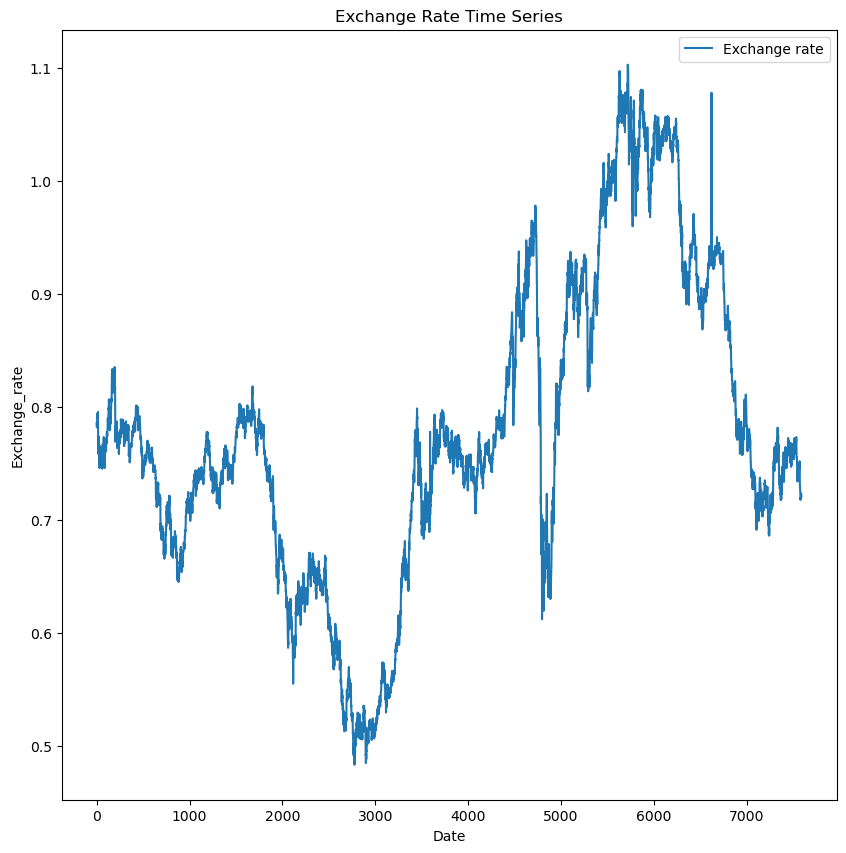

In [7]:
# Plot the exchange data 
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,10))
plt.plot(exchange_data['Ex_rate'],label="Exchange rate")
plt.title("Exchange Rate Time Series")
plt.xlabel("Date")
plt.ylabel("Exchange_rate")
plt.legend()
plt.show()

In [8]:
result=seasonal_decompose(exchange_data["Ex_rate"],model="multiplicative",period=12)

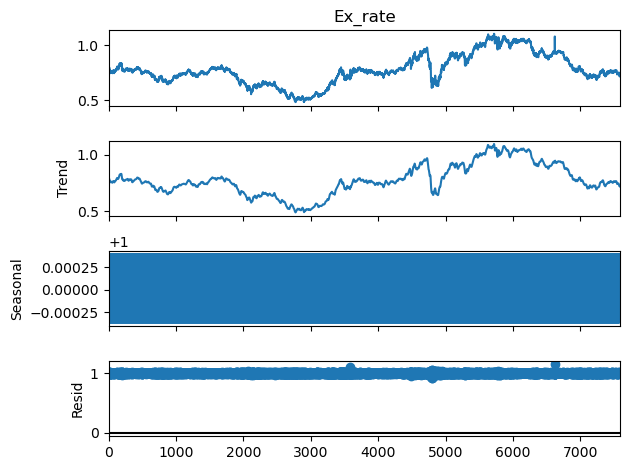

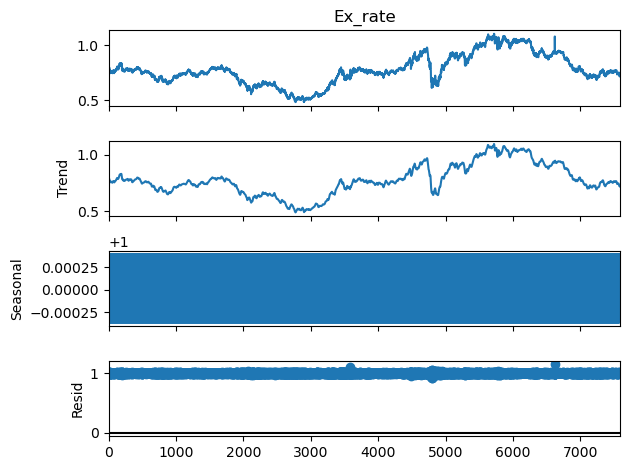

In [9]:
result.plot()

<Axes: >

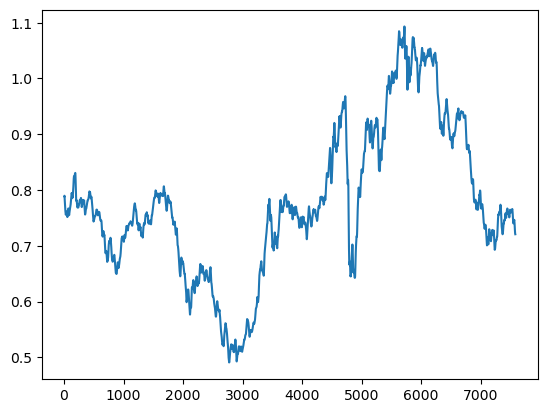

In [10]:
result.trend.plot()

<Axes: >

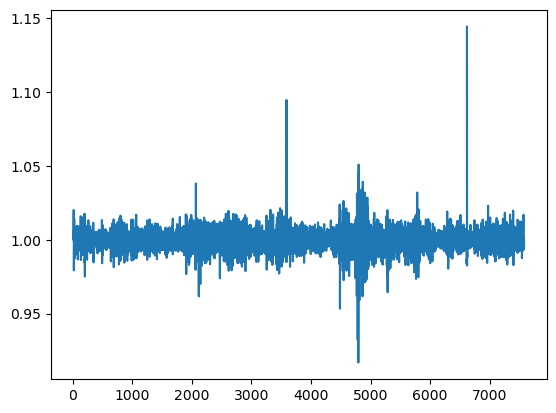

In [11]:
result.resid.plot()

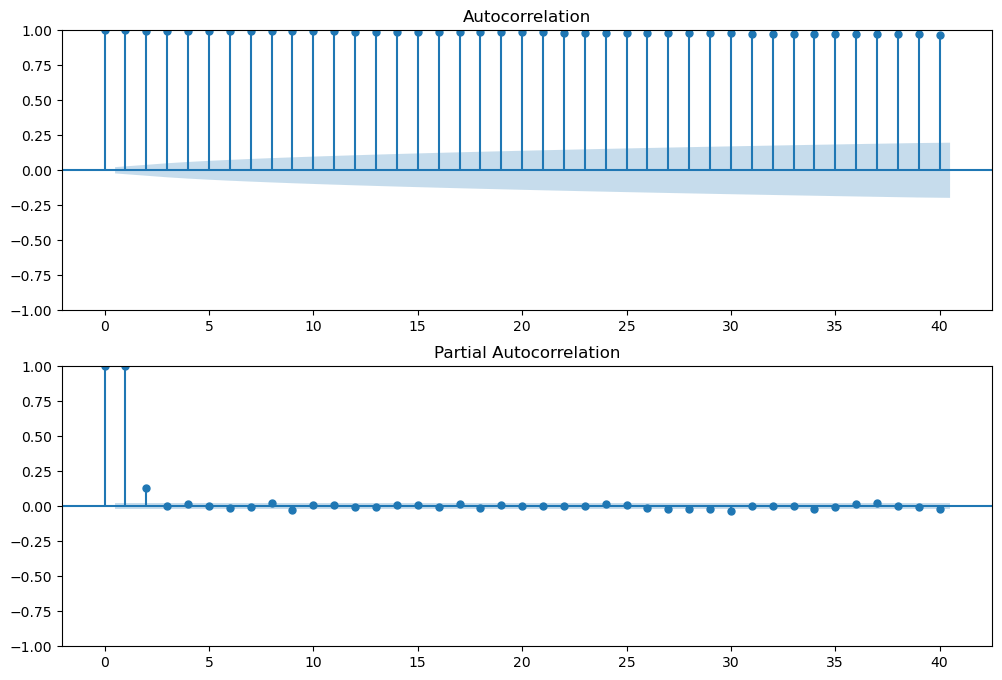

In [12]:
#  Parameter Selection for ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(exchange_data['Ex_rate'], ax=ax[0], lags=40)
plot_pacf(exchange_data['Ex_rate'], ax=ax[1], lags=40)

plt.show()

In [13]:
# Model Fitting 
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [14]:
# Define the Arima model 
p,d,q=(1,1,1)
model = ARIMA(exchange_data["Ex_rate"],order=(p,d,q))

# Fit the model 
Model_Fit=model.fit()

# Summary of the model
print(Model_Fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Mon, 29 Jul 2024   AIC                         -56102.322
Time:                        22:55:11   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

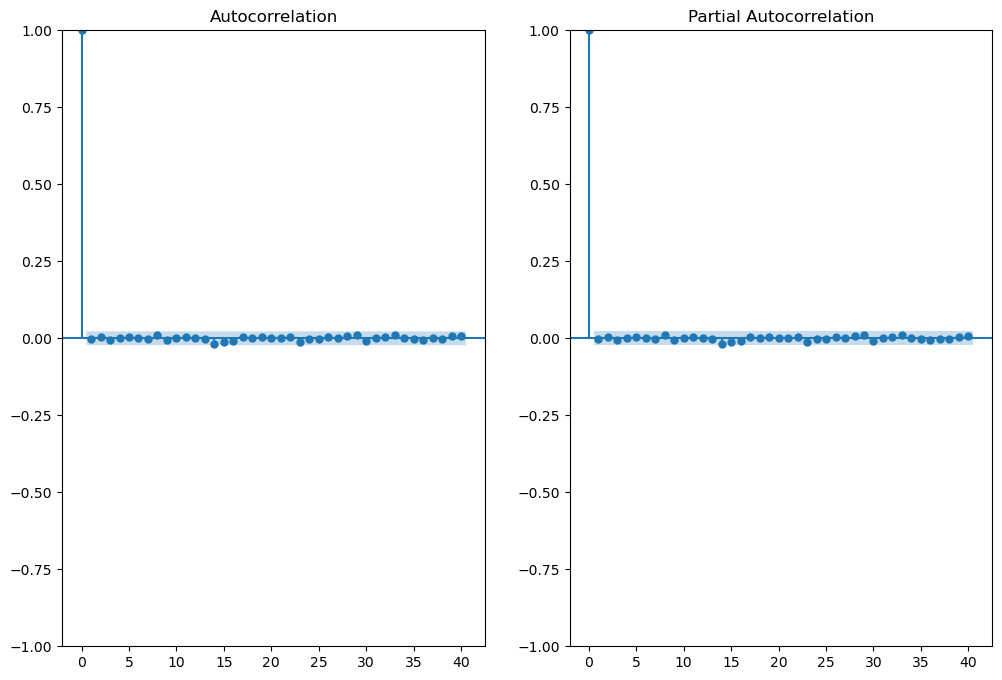

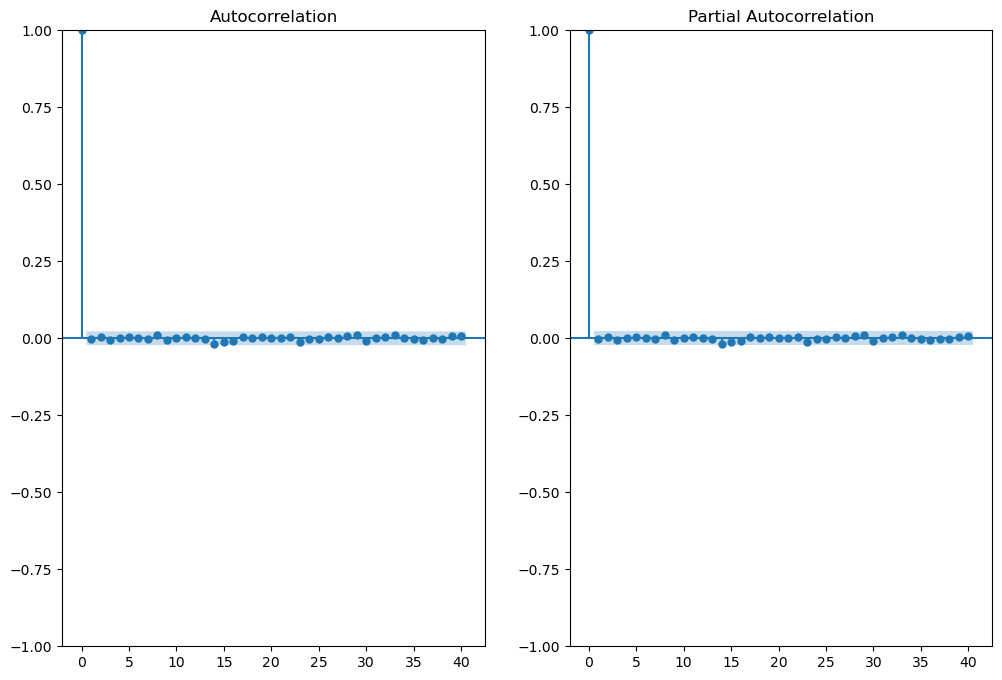

In [15]:
# Residual Diagnotics 
residuals=Model_Fit.resid
 
# plot the residuals 
fig , ax = plt.subplots(1,2,figsize=(12,8))
plot_acf(residuals,ax=ax[0],lags=40)
plot_pacf(residuals,ax=ax[1],lags=40)

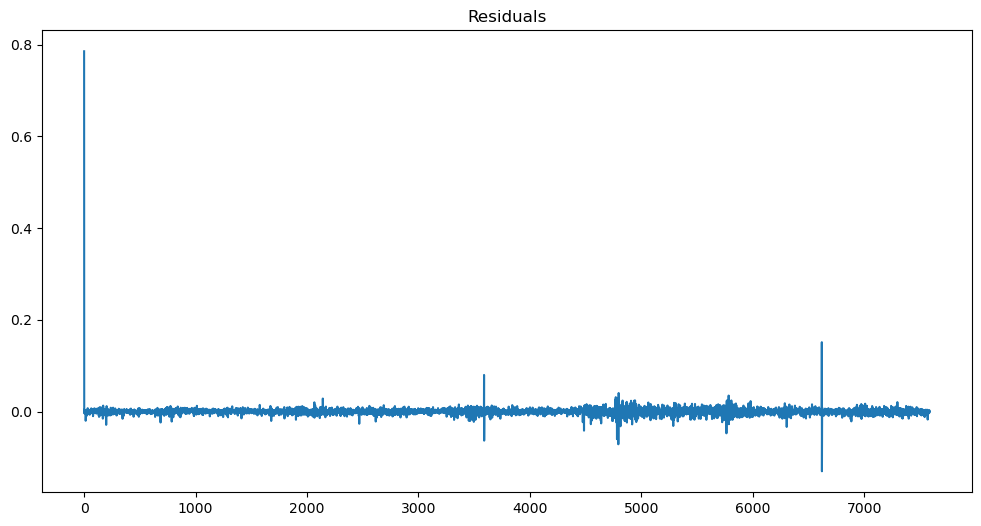

In [16]:
# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

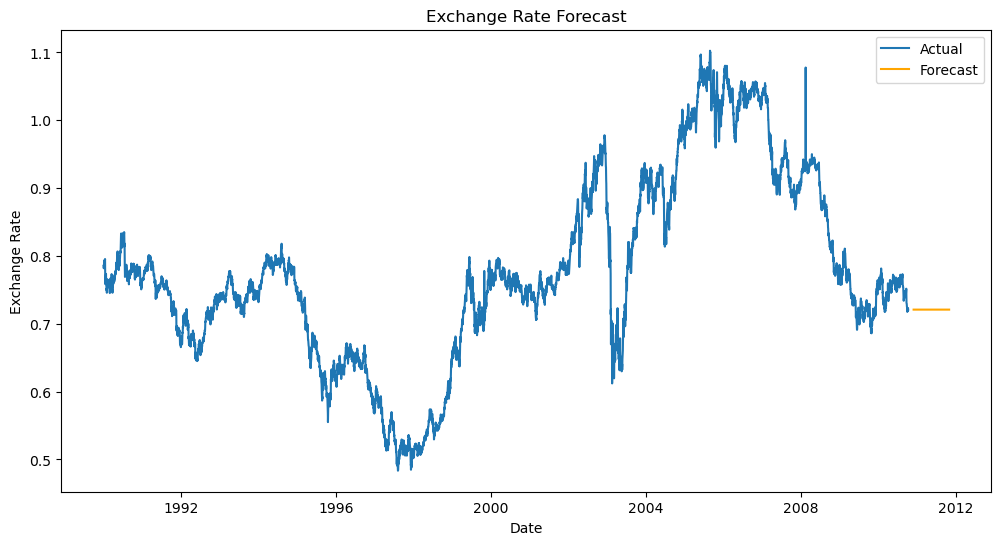

In [17]:
# Forecasting
forecast_steps = 12  # Number of steps to forecast
forecast = Model_Fit.forecast(steps=forecast_steps)

# Parse the dates 
exchange_data['Date']=pd.to_datetime(exchange_data['Date'], format="%d-%m-%Y %H:%M")

# Generate the forecasted date_range 
forcast_date=pd.date_range(exchange_data["Date"].iloc[-1],periods=forecast_steps+1,freq="M")[1:]
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(exchange_data['Date'], exchange_data['Ex_rate'], label='Actual')
plt.plot(forcast_date,forecast,label="Forecast",color="orange")
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate Forecast')
plt.legend()
plt.show()


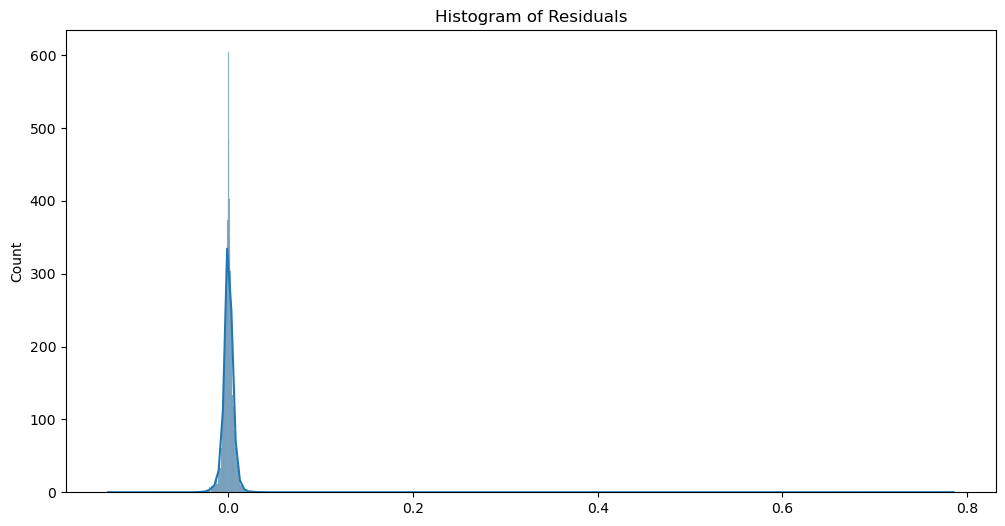

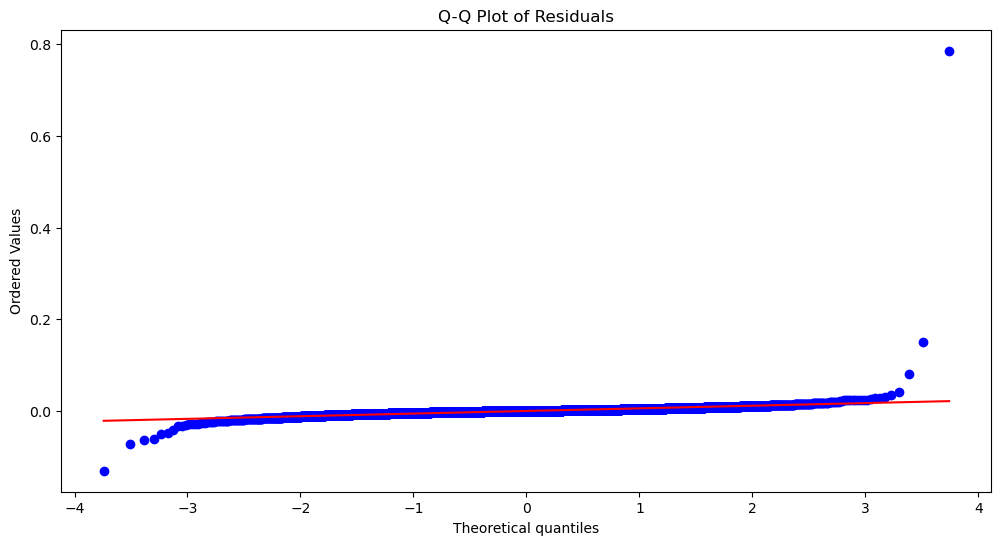

In [18]:
import seaborn as sns
import scipy.stats as stats

# Plot histogram of residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot of residuals
plt.figure(figsize=(12, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

Text(0, 0.5, 'Exchange_Rate')

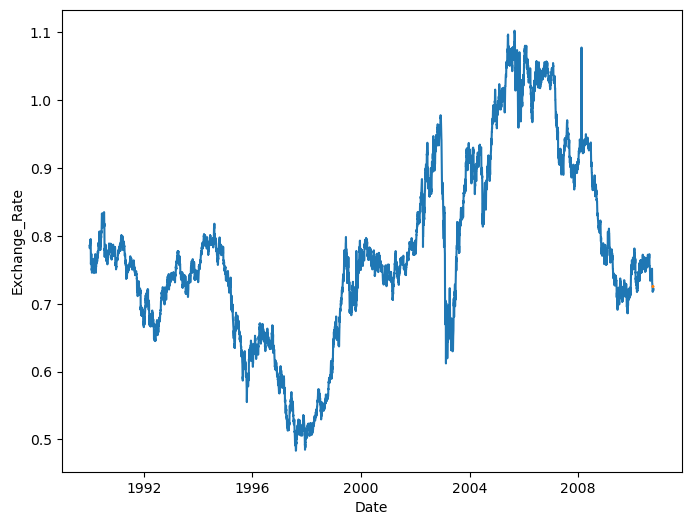

In [19]:
# Model Building - Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

exchange_data['Date'] = pd.to_datetime(exchange_data['Date'], format='%d-%m-%Y %H:%M')
exchange_data.set_index('Date', inplace=True)
# split the data into training & testing data 
train_data=exchange_data["Ex_rate"][:-12]
test_data=exchange_data["Ex_rate"][-12:]

# fit the holtwinters seasonal data 
model=ExponentialSmoothing(train_data,seasonal="add",seasonal_periods=12).fit()

# forecast the hotlwinter seasonal data 
forecast_holtwinter=model.forecast(steps=12)

# plot the holtwinter seasonal data 
plt.figure(figsize=(8,6))
plt.plot(exchange_data.index,exchange_data["Ex_rate"],label="Actual")
plt.plot(forecast_holtwinter.index,forecast_holtwinter,label="forecast")
plt.xlabel("Date")
plt.ylabel("Exchange_Rate")

In [31]:
#  Evaluation and Comparison Compute Error Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE=mean_absolute_error(test_data,forecast_holtwinter)
RMSE=mean_squared_error(test_data,forecast_holtwinter,squared=False)
MAPE=(abs((test_data - forecast_holtwinter) / test_data).mean()) * 100
print(f'Mean_absolute_error:-',MAE)
print(f'Mean_absolute_percentage_error:-',MAPE)
print(f'Root_mean_squared_error:-',RMSE)

Mean_absolute_error:- 0.00460667069859295
Mean_absolute_percentage_error:- 0.6401170948373843
Root_mean_squared_error:- 0.0049711811393516585
